In [ ]:
import psycopg2
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Connecting to the Database
print("Trying to connect to db")
conn = psycopg2.connect(
    database="piscineds",
    user="ggobert",
    password="mysecretpassword",
    host=0
)
print("Connection success!")

cur = conn.cursor()
cur.execute(""" SELECT * FROM  customers """)
results = cur.fetchall()

cur.close()
conn.close()

# 1m 55.2s

Trying to connect to db
Connection success!


In [ ]:
colnames = [desc[0] for desc in cur.description]
df = pd.DataFrame(results, columns=colnames)

# 2m 0.5s

In [ ]:
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)

user_data = df.groupby('user_id').agg({
    'price': 'sum',  # Somme des prix par utilisateur
    'event_type': 'count',  # Nombre total d'événements par utilisateur
    'product_id': 'nunique',  # Nombre unique de produits achetés par utilisateur
    'user_session': 'nunique',  # Nombre de sessions utilisateur
}).reset_index()

user_data.head()

# 1m 2.9s

,user_id,price,event_type,product_id,user_session
0,465496,30.00,3,3,2
1,1120748,4.05,1,1,1
2,1180452,25.40,1,1,1
3,1458813,159.36,31,25,4
4,2963072,906.85,24,12,1


In [ ]:
scaler = StandardScaler()
features_to_scale = ['price', 'event_type', 'product_id', 'user_session']
scaled_data = scaler.fit_transform(user_data[features_to_scale])

In [ ]:
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale)
print("Données après normalisation :")
print(scaled_df.head())

Données après normalisation :
      price  event_type  product_id  user_session
0 -0.158283   -0.144268   -0.128992     -0.034526
1 -0.216211   -0.178483   -0.212433     -0.084224
2 -0.168552   -0.178483   -0.212433     -0.084224
3  0.130485    0.334739    0.788849      0.064870
4  1.799095    0.214987    0.246488     -0.084224


In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

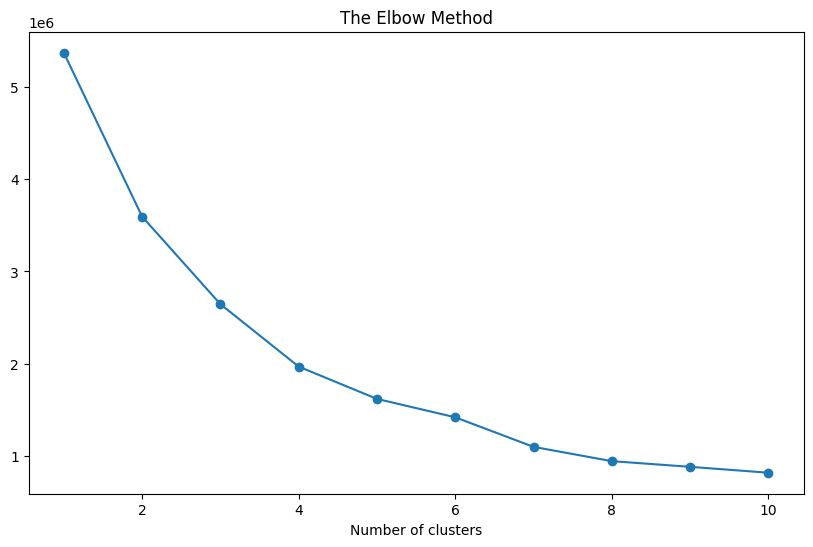

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()